In [2]:
import random
import numpy as np

In [3]:
# Finding majority votes in a given sequence or array
def majority_vote(votes):
    """ Returns the element with most no. of votes. 
    Returns element at random in case of a tie."""
    vote_count = {}
    for vote in votes:
        if vote in vote_count:
            vote_count[vote] += 1
        else:
            vote_count[vote] = 1
            
    winner_element = []
    max_vote = max(vote_count.values())
    for element, count in vote_count.items():
        if count == max_vote:
            winner_element.append(element)
    return random.choice(winner_element)
votes = [1,2,3,1,2,3,1,2,3,3,3,3]
majority_vote(votes)

3

In [4]:
# Distance between two points
def distance(p1, p2):
    return np.sqrt(np.sum(np.square(p1 - p2)))

In [5]:
# Finding the nearest neighbour
# loop over all the points 
#     find the distances of all points from a point p whose class is to be determined
#     find the k-nearest neighbours using the k shortest distances by soring the distances
# decide the class based on the points and their classses
# test points
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3],[3,1], [3,2], [3,3],])

In [6]:
p = np.array([2.5, 2])
p

array([2.5, 2. ])

In [7]:
import matplotlib.pyplot as plt

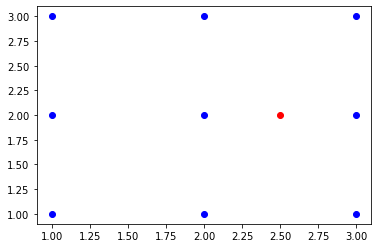

In [8]:
plt.plot(points[:,0], points[:,1], "bo")
plt.plot(p[0], p[1],"ro")

In [9]:
distances = np.zeros(points.shape[0])

In [10]:
for i in range(len(distances)):
    distances[i] = distance(p, points[i])

In [11]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [12]:
# Using the argsort function of the numpy to get the sorted index of the array distances
ind = np.argsort(distances)
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2])

In [13]:
distances[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [14]:
def find_nearest_neighbours(p, points, k=5):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [15]:
ind = find_nearest_neighbours(p, points, 2)
points[ind]

array([[2, 2],
       [3, 2]])

In [16]:
ind

array([4, 7])

In [17]:
def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbours(p, points, k=5)
    return majority_vote(outcomes[ind])

In [18]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])
len(outcomes)

9

In [19]:
knn_predict(np.array([2.5, 2.7]), points, outcomes, 2)

1

In [20]:
knn_predict(np.array([1.5, 2.7]), points, outcomes, 3)

1

In [21]:
knn_predict(np.array([0.5, 2.7]), points, outcomes, 3)

0

In [22]:
# Generating Synthetic Data
import scipy.stats as ss

In [23]:
ss.norm(0,1).rvs((6,2))

array([[-0.55574192,  0.69749542],
       [-0.99921863, -0.59453094],
       [ 0.79568803,  1.62382847],
       [ 0.92715371,  0.97652515],
       [-2.01661129, -1.72346691],
       [-1.32027467,  0.19100938]])

In [24]:
ss.norm(1,1).rvs((6,2))

array([[ 0.06894918,  0.75681993],
       [-0.61707297,  2.49120665],
       [ 1.67741753, -1.44468258],
       [ 2.11426673,  0.06989834],
       [ 1.12667442,  0.77307564],
       [ 0.41932943,  2.44743013]])

In [26]:
np.concatenate((ss.norm(0,1).rvs((6,2)), ss.norm(1,1).rvs((6,2))), axis = 0)

array([[ 0.98058669,  0.82686914],
       [-0.78754989, -1.49424296],
       [-0.7956652 , -0.20005405],
       [-0.12524261, -0.85522243],
       [ 0.45234057,  0.70214273],
       [-0.16262574,  0.87221434],
       [ 1.25428768,  1.2946913 ],
       [-0.76522915,  0.324797  ],
       [ 2.39156891,  2.48242266],
       [ 0.50439763,  2.56029753],
       [ 0.55953703, -0.40969402],
       [-0.78277966,  2.0545671 ]])

In [27]:
def synthetic_data(n=50):
    """ Create two sets of points from two bivariate distributions"""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)), axis = 0)
    return (points, outcomes)

In [28]:
n = 20
points, outcomes = synthetic_data(n)

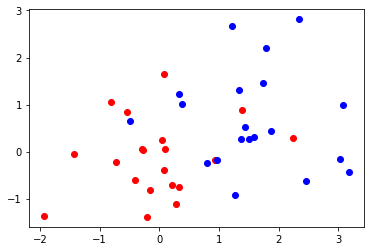

In [31]:
plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")
plt.show()